Tableau Dashboard Link:
https://public.tableau.com/views/h8_p0m1_Visualization_Imam_Zarkasie/Visualisasi?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

Tableau Dashboard Statistical Analysis Link:
https://public.tableau.com/views/h8_p0m1_StatisticalAnalysis_Imam_Zarkasie/StatisticalAnalysis?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

Dataset:

Starbucks Customer Survey

https://www.kaggle.com/datasets/mahirahmzh/starbucks-customer-retention-malaysia-survey



# Introduction
Name: Imam Buchori Zarkasie


#Problem Statement

Analyzing customer demographics and looking at customer loyalty and seeing improvement gaps that can be done by Starbucks.

## Description Point
1. How old are the customers?
2. What are the employment status of the customers?
3. What are the preferences of Starbucks customers?
4. How far does the customer travel?
5. Is membercard ownership considered loyal?
6. How to determine the right product price for the customer?


#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Data Loading

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle
!cp '/content/kaggle.json' ~/.kaggle

cp: cannot stat '/content/kaggle.json': No such file or directory


In [ ]:
#Datasource: https://www.kaggle.com/datasets/mahirahmzh/starbucks-customer-retention-malaysia-survey
!kaggle datasets download -d mahirahmzh/starbucks-customer-retention-malaysia-survey

In [ ]:
!unzip -q /content/starbucks-customer-retention-malaysia-survey.zip -d datasetML1

unzip:  cannot find or open /content/starbucks-customer-retention-malaysia-survey.zip, /content/starbucks-customer-retention-malaysia-survey.zip.zip or /content/starbucks-customer-retention-malaysia-survey.zip.ZIP.


In [ ]:
#Import Dataset
df = pd.read_csv('/content/drive/MyDrive/datasetML1/Starbucks satisfactory survey encode cleaned.csv')
df.head(5)

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
0,1,1,1,0,0,3,0,1,0,0,...,3,1,1,1,1,1,1,1,1,0
1,2,1,1,0,0,3,2,0,1,0,...,2,1,1,1,1,1,1,1,1,0
2,3,0,1,2,0,2,0,1,2,0,...,3,1,1,1,1,1,1,1,1,0
3,4,1,1,0,0,3,2,0,2,1,...,3,1,1,1,1,1,1,1,1,1
4,5,0,1,0,0,2,2,1,1,1,...,3,1,1,1,1,1,1,1,1,0


In [ ]:
#View the amount of data and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Id                      113 non-null    int64
 1   gender                  113 non-null    int64
 2   age                     113 non-null    int64
 3   status                  113 non-null    int64
 4   income                  113 non-null    int64
 5   visitNo                 113 non-null    int64
 6   method                  113 non-null    int64
 7   timeSpend               113 non-null    int64
 8   location                113 non-null    int64
 9   membershipCard          113 non-null    int64
 10  itemPurchaseCoffee      113 non-null    int64
 11  itempurchaseCold        113 non-null    int64
 12  itemPurchasePastries    113 non-null    int64
 13  itemPurchaseJuices      113 non-null    int64
 14  itemPurchaseSandwiches  113 non-null    int64
 15  itemPurchaseOthers     

#Data Cleaning

In [ ]:
#Create a new dataframe based on some of the required variables
data = df[["Id", "gender", "age", "status", "method", "location", "membershipCard", "spendPurchase", "loyal"]]
data

,Id,gender,age,status,method,location,membershipCard,spendPurchase,loyal
0,1,1,1,0,0,0,0,1,0
1,2,1,1,0,2,1,0,1,0
2,3,0,1,2,0,2,0,1,0
3,4,1,1,0,2,2,1,1,1
4,5,0,1,0,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...
108,118,0,3,1,0,1,0,2,0
109,119,0,1,2,0,1,0,3,0
110,120,0,1,0,0,1,1,1,1
111,121,1,1,2,2,0,1,1,0


The data used has 9 columns and 113 rows. Dataset is data that has been encoded so that it has a value in the form of a number with a categorical type. The following is an interpretation of the values ​​from the dataset:

*   gender: 0-Female ; 1-Male
*   age: 0-Below 20 ; 1-20 to 29; 2-30 to 39 ; 3-Above 40
*   status: 0-Student ; 1-Self_Employed ; 2-Employed ; 3-Housewife
*   method: 0-Dine In ; 1-Drive Thru ; 2-Take Away ; 3-Never ; 4-Others
*   Location: 0-Within 1km ; 1-1km to 3km ; 2-More than 3km
*   membershipCard: 0-Yes ; 1-No
*   spendPurchase: 0-Zero ; 1-Less than RM20 ; 2-RM20 to RM40 ; 3-More than RM40
*   loyal: 0-Yes ; 1-No









In [ ]:
#View the amount of data and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Id              113 non-null    int64
 1   gender          113 non-null    int64
 2   age             113 non-null    int64
 3   status          113 non-null    int64
 4   method          113 non-null    int64
 5   location        113 non-null    int64
 6   membershipCard  113 non-null    int64
 7   spendPurchase   113 non-null    int64
 8   loyal           113 non-null    int64
dtypes: int64(9)
memory usage: 8.1 KB


The data type is integer and there is no missing value

#Analysis

## How old are the customers?

In [ ]:
#Create a data series for the age variable
age = data['age'] = data['age'].replace({0: '<20', 1: '20-29', 2: '30-39', 3: '>40'})

<ipython-input-10-6f1adc8ea543>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age = data['age'] = data['age'].replace({0: '<20', 1: '20-29', 2: '30-39', 3: '>40'})


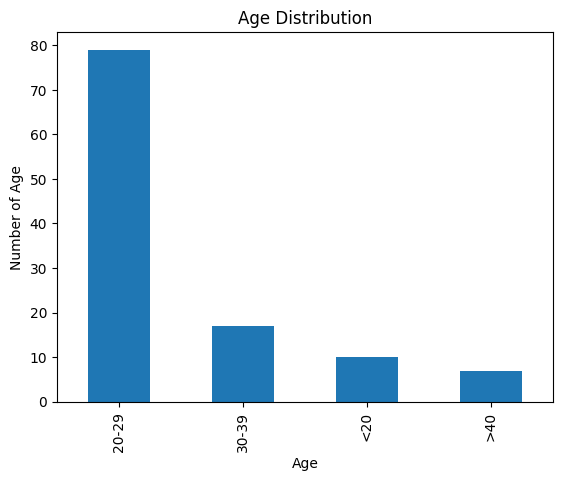

In [ ]:
#Create Age Distribution plots
age.value_counts().plot(kind='bar')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Age')

plt.show()

The age range of most Starbuck customers is in the 20-29 year range, at that age there is a lot of trending information that can be used as marketing campaigns such as events, music, etc. in order to increase Starbucks engagement.

## What are the employment status of the customers?

In [ ]:
#Create a data series for the status variable
status = data['status'] = data['status'].replace({0: 'Student', 1: 'Self-Employed', 2: 'Employed', 3: 'Housewife'})

<ipython-input-12-fb5cdc9bd4cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  status = data['status'] = data['status'].replace({0: 'Student', 1: 'Self-Employed', 2: 'Employed', 3: 'Housewife'})


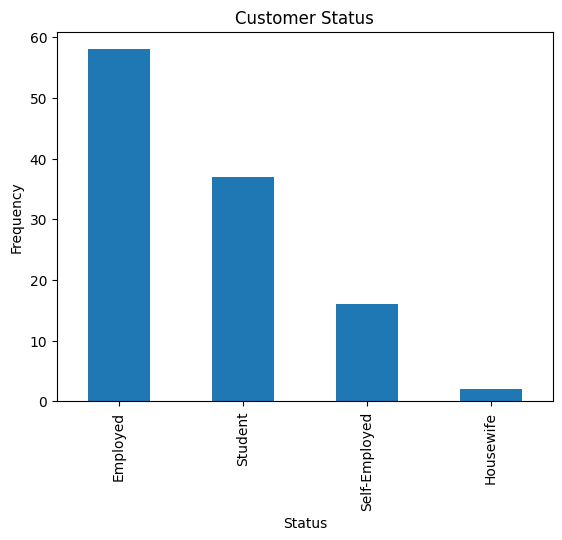

In [ ]:
#Create Status plots
status.value_counts().plot(kind='bar')

plt.title('Customer Status')
plt.xlabel('Status')
plt.ylabel('Frequency')

plt.show()

The job status of the majority of Starbucks cutomers is "Employed" and "Student", in statuses with high levels of productivity it is necessary to pay attention to the facilities and convenience of Starbucks outlets in order to be able to support customer activities.

## What is the customer's place preference at Starbucks?

In [ ]:
#Create data series for method variables
method = data['method'] = data['method'].replace({0: 'Dine in', 1: 'Drive_Thru', 2: 'Take Away', 3: 'Never', 4: 'Others', 5: 'Others'})

<ipython-input-14-73be29a4abb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method = data['method'] = data['method'].replace({0: 'Dine in', 1: 'Drive_Thru', 2: 'Take Away', 3: 'Never', 4: 'Others', 5: 'Others'})


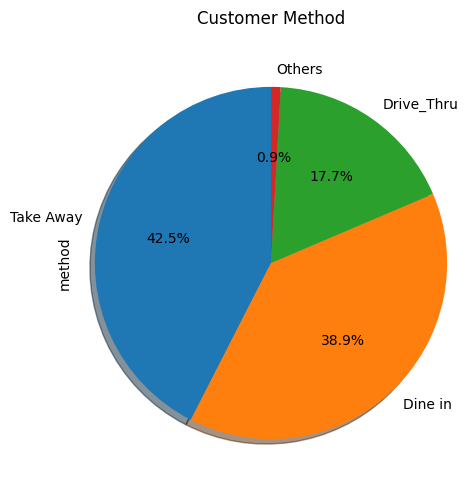

In [ ]:
#Plot Methods
method.value_counts().plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90°
                            shadow=True,       # add shadow      
                            )

plt.title('Customer Method')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

Starbucks customers mostly order Take Away compared to Dine In and Drive-Thru, so that the ordering process is simpler, an advance ordering system can be implemented and all that's left is to pick-up the order.

## How far did the customer travel?

In [ ]:
#Create a data series for the location variable
location = data['location'] = data['location'].replace({0: '<1km', 1: '1-3km', 2: '>3km'})

<ipython-input-16-fb81561b219d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location = data['location'] = data['location'].replace({0: '<1km', 1: '1-3km', 2: '>3km'})


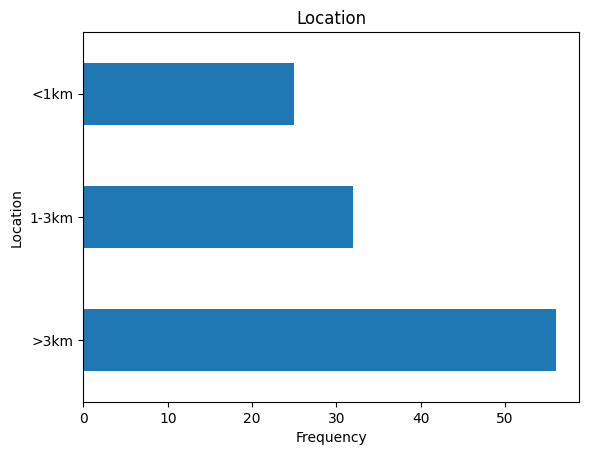

In [ ]:
#Make location plots
location.value_counts().plot(kind='barh')

plt.title('Location')
plt.xlabel('Frequency')
plt.ylabel('Location')

plt.show()

The majority of Starbucks customers come with distances > 3km, therefore in order to make it easier for customers who travel long distances it is necessary to accommodate them with delivery/delivery services and work together with delivery service platforms so that customers are not burdened with delivery costs.

## Is Member Card ownership considered loyal? (Inferential Statistics)

Using the Paired Test method

In [ ]:
#Look at the distribution of data on the membershipCard variable
data["membershipCard"].value_counts()

0    60
1    53
Name: membershipCard, dtype: int64

In [ ]:
#Look at the distribution of data on loyal variables
data["loyal"].value_counts()

0    90
1    23
Name: loyal, dtype: int64

In [ ]:
#Separate data series with membershipCard = 0 and membershipCard = 1
Member = data[data['membershipCard'] == 0 ]['loyal']
Non_Member = data[data['membershipCard'] == 1 ]['loyal']

In [ ]:
#Look at the amount of data on the Member series against loyal
Member

0      0
1      0
2      0
6      0
7      0
8      0
12     0
13     0
14     1
15     1
16     0
17     0
18     0
19     0
20     1
23     0
25     0
28     0
29     0
30     0
31     0
33     1
38     0
39     0
40     0
41     0
43     0
46     0
47     0
49     0
51     0
52     0
54     0
57     0
60     0
63     0
65     0
67     0
68     0
69     0
71     0
73     0
76     1
77     0
78     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
92     0
93     0
96     0
108    0
109    0
Name: loyal, dtype: int64

In [ ]:
#Look at the amount of data in the Non_Member series against loyal
Non_Member

3      1
4      0
5      0
9      0
10     0
11     1
21     0
22     1
24     0
26     1
27     0
32     0
34     0
35     1
36     0
37     0
42     0
44     0
45     0
48     1
50     0
53     0
55     0
56     0
58     0
59     0
61     1
62     1
64     1
66     0
70     0
72     0
74     1
75     1
79     1
90     0
91     0
94     0
95     0
97     0
98     1
99     0
100    0
101    1
102    1
103    0
104    0
105    1
106    0
107    0
110    1
111    0
112    1
Name: loyal, dtype: int64

The value between the membershipCard with values ​​0 and 1 for the loyal variable at a glance is the same, to ensure this assumption a Two-Sided Paired Test is carried out, with the following hypothesis:

**H0: Member = Non_Member**

**H1: Member != Non_Member**

In [ ]:
#Calculating p-value with t-stat
t_stat,p_val = stats.ttest_rel(Member.sample(53),Non_Member.sample(53)) #we take 53 sample of each data to make the size the same.
print('P-value:',p_val)

P-value: 0.0011735790231159195


Because the p-value < 0.05, it fails to reject H0, so it can be concluded that Member Card ownership is considered a loyal customer and Non_Member is not a loyal customer.

## How to determine the right product price for the customer? (Descriptive statistics)

In [ ]:
#Create a data series for the spendPurchase variable
spend = data['spendPurchase'] = data['spendPurchase'].replace({0: '0', 1: '<RM20', 2: 'RM20-RM40', 3: '>RM40'})

<ipython-input-24-f9daaca88300>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spend = data['spendPurchase'] = data['spendPurchase'].replace({0: '0', 1: '<RM20', 2: 'RM20-RM40', 3: '>RM40'})


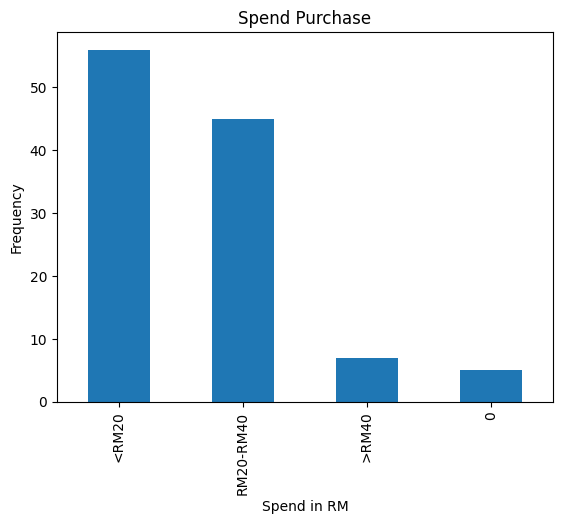

In [ ]:
#Make Spend Purchase plots
spend.value_counts().plot(kind='bar')

plt.title('Spend Purchase')
plt.xlabel('Spend in RM')
plt.ylabel('Frequency')

plt.show()

The total expenditure of the majority of Starbucks customers is in the RM0-RM40 range, so the ideal product price for customers does not exceed RM40.

#Conclusion and Recommendation

There are several conclusions drawn from this analysis, including:

* Customers who come to Starbucks are mostly **20-29 years old**, this age is the age that always gets updates on the **latest trends**, from that it can be used as a marketing strategy such as creating promotional programs related to the latest trends such as music, community, and campaigns social.

* Starbucks customers have the most job status as "Employed" which has **high productivity**, so it is recommended to improve services and facilities at related outlets to support productivity as "Employed" who decide to work in cafes.
* As many as **42.5%** of Starbucks customers choose to order **Take Away**, so more services are needed at the Take Away counter so orders can be given quickly.
* The majority of Starbucks customers come with **distances > 3km**, therefore in order to make it easier for customers who travel long distances **to be accommodated with delivery/delivery services** and work together with delivery service platforms so that customers are not burdened with delivery costs.
* **Customers who have a Customer Card are indicated as loyal customers** so that the loyalty program is running well, it is necessary to maintain the program by giving rewards to loyal customers so that they can survive.
* The amount of money spent by the majority of customers is in the **RM 20 - RM40** range, so if a product is to be sold with high frequency the price of the product **must be in that range**.



